In [2]:
import pandas as pd

#df_data1 = pd.read_csv(r"C:\Users\harry\OneDrive\Desktop\공모전\유통데이터활용경진대회\데이터2 라면,통조림,상온즉석 통합.csv")
#df_data1

In [5]:
# 모든 컬럼 출력
print(df_data1.columns.tolist())

['Unnamed: 0.1', '상품 바코드(대한상의)', '판매수량', '구분', '우편번호', '매출처코드', '옵션코드', '규격', '입수', '상품명', '대분류', '중분류', '소분류', '판매일', '가공식품류', '기타', '기타잡화', '냉동냉장', '면류.라면류', '빵.케익.과자류', '생활잡화', '선물세트', '식자재-세원유통', '신선식품', '유제품류', '음료,차류', '일상용품', '조미료류', '통조림류', '소비자물가지수', '생활물가지수', '기준금리', '전체 실업률', '남성 실업률', '여성 실업률', '소비자심리지수', '국내총생산(명목GDP)', '경제성장률(실질GDP성장률)', '환율(원/달러)', 'Unnamed: 0', '평균 발주 일자', '총 발주건수']


In [7]:
#원본 데이터에서 필요없는 컬럼 및 전체 데이터 FALSE인 컬럼 제외
df_use = df_data1[['판매수량', '판매일', '가공식품류', '기타잡화', 
                   '빵.케익.과자류', '생활잡화',
                   '음료,차류', '일상용품', '조미료류', '소비자물가지수', '생활물가지수', '기준금리', 
                   '전체 실업률', '남성 실업률', '여성 실업률', '소비자심리지수', '국내총생산(명목GDP)', '경제성장률(실질GDP성장률)', 
                   '환율(원/달러)', '평균 발주 일자', '총 발주건수']]
df_use

,판매수량,판매일,가공식품류,기타잡화,빵.케익.과자류,생활잡화,"음료,차류",일상용품,조미료류,소비자물가지수,...,기준금리,전체 실업률,남성 실업률,여성 실업률,소비자심리지수,국내총생산(명목GDP),경제성장률(실질GDP성장률),환율(원/달러),평균 발주 일자,총 발주건수
0,29,2021-01-31,0.0,0.0,0.524752,0.0,0.544554,0.613861,0.0,101.04,...,0.5,5.7,5.0,6.7,95.3,"515,116.3",2.5,"1,118.8",17.6,61
1,51,2021-01-31,0.0,0.0,0.524752,0.0,0.544554,0.613861,0.0,101.04,...,0.5,5.7,5.0,6.7,95.3,"515,116.3",2.5,"1,118.8",20.4,53
2,5,2021-01-31,0.0,0.0,0.524752,0.0,0.544554,0.613861,0.0,101.04,...,0.5,5.7,5.0,6.7,95.3,"515,116.3",2.5,"1,118.8",30.4,24
3,2,2021-01-31,0.0,0.0,0.524752,0.0,0.544554,0.613861,0.0,101.04,...,0.5,5.7,5.0,6.7,95.3,"515,116.3",2.5,"1,118.8",0.0,1
4,160,2021-01-31,0.0,0.0,0.524752,0.0,0.544554,0.613861,0.0,101.04,...,0.5,5.7,5.0,6.7,95.3,"515,116.3",2.5,"1,118.8",28.1,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522,9,2023-12-26,0.0,0.0,0.000000,0.0,0.545455,0.000000,0.0,112.73,...,3.5,3.3,2.9,3.7,99.7,"632,769.8",2.1,"1,288.0",27.9,39
8523,17,2023-12-26,0.0,0.0,0.000000,0.0,0.545455,0.000000,0.0,112.73,...,3.5,3.3,2.9,3.7,99.7,"632,769.8",2.1,"1,288.0",15.8,47
8524,3,2023-12-26,0.0,0.0,0.000000,0.0,0.545455,0.000000,0.0,112.73,...,3.5,3.3,2.9,3.7,99.7,"632,769.8",2.1,"1,288.0",21.0,50
8525,32,2023-12-26,0.0,0.0,0.000000,0.0,0.545455,0.000000,0.0,112.73,...,3.5,3.3,2.9,3.7,99.7,"632,769.8",2.1,"1,288.0",27.9,39


In [9]:
# '판매일'을 기준으로 그룹화하여 판매수량은 합계, 다른 수치형 컬럼은 평균으로 산출
agg_dict = { '판매수량': 'sum' }  # 판매수량은 합계로 지정

# 수치형 컬럼을 선택하되 '판매수량'과 '판매일' 제외
numeric_cols = df_use.select_dtypes(include='number').columns.difference(['판매수량'])

# 나머지 컬럼에 대해 평균을 지정
agg_dict.update({col: 'mean' for col in numeric_cols})

# 그룹화 및 집계
df_use = df_use.groupby('판매일').agg(agg_dict).reset_index()

# 결과 확인
df_use

,판매일,판매수량,가공식품류,경제성장률(실질GDP성장률),기준금리,기타잡화,남성 실업률,빵.케익.과자류,생활물가지수,생활잡화,소비자물가지수,소비자심리지수,여성 실업률,"음료,차류",일상용품,전체 실업률,조미료류,총 발주건수,평균 발주 일자
0,2021-01-31,4497,0.0,2.5,0.5,0.0,5.0,0.524752,101.20,0.0,101.04,95.3,6.7,0.544554,0.613861,5.7,0.0,34.933673,44.049490
1,2021-02-28,3354,0.0,2.5,0.5,0.0,4.7,0.516129,102.11,0.0,101.58,97.4,5.2,0.580645,0.516129,4.9,0.0,36.911602,33.612707
2,2021-03-31,4031,0.0,2.5,0.5,0.0,4.2,0.000000,102.53,0.0,101.84,100.6,4.4,0.000000,0.527778,4.3,0.0,32.241935,40.484946
3,2021-04-30,4472,0.0,7.0,0.5,0.0,4.0,0.000000,102.65,0.0,101.98,102.4,4.1,0.567568,0.549550,4.0,0.0,34.261538,32.674359
4,2021-05-31,3585,0.0,7.0,0.5,0.0,4.0,0.000000,102.67,0.0,102.05,105.5,4.0,0.536842,0.663158,4.0,0.0,37.240642,34.531551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2023-11-28,1436,0.0,2.1,3.5,0.0,2.4,0.000000,115.22,0.0,112.68,97.3,2.2,0.509091,0.000000,2.3,0.0,39.957895,26.181053
59,2023-12-05,1781,0.0,2.1,3.5,0.0,2.9,0.000000,114.84,0.0,112.73,99.7,3.7,0.500000,0.000000,3.3,0.0,39.480392,24.588235
60,2023-12-12,1269,0.0,2.1,3.5,0.0,2.9,0.000000,114.84,0.0,112.73,99.7,3.7,0.616667,0.000000,3.3,0.0,36.608247,28.265979
61,2023-12-19,1196,0.0,2.1,3.5,0.0,2.9,0.000000,114.84,0.0,112.73,99.7,3.7,0.571429,0.000000,3.3,0.0,45.378641,27.552427


In [11]:
df_use.to_excel(r"C:\Users\harry\OneDrive\Desktop\공모전\유통데이터활용경진대회\데이터2_독립변수전체.xlsx", index=False)

In [7]:
df_use_add = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\유통데이터 활용 경진대회\데이터1_독립변수전체_24추가.xlsx")
df_use_add

,판매일,판매수량,가공식품류,경제성장률(실질GDP성장률),"과자,씨리얼,초코릿,빵류",기준금리,남성 실업률,"라면,통조림,상온즉석",명절세트(비식품),명절세트(식품),...,양곡,여성 실업률,잡화,전체 실업률,총 발주건수,"축산,수산,건해산","커피,차류",평균 발주 일자,"헤어,바디,구강",화장지류
0,2021-01-04,1039,0.698113,2.5,0.679245,0.5,5.0,1,0,0,...,0,6.7,0.547170,5.7,384.000000,0,0.000000,3.298969,0,0
1,2021-01-05,3502,0.666667,2.5,0.586207,0.5,5.0,1,0,0,...,0,6.7,0.735632,5.7,316.843648,0,0.540230,3.977850,0,0
2,2021-01-12,4037,0.721154,2.5,0.855769,0.5,5.0,1,0,0,...,0,6.7,0.682692,5.7,327.749311,0,0.000000,5.476309,0,0
3,2021-01-19,3023,0.736842,2.5,0.757895,0.5,5.0,1,0,0,...,0,6.7,0.726316,5.7,334.207921,0,0.505263,4.533993,0,0
4,2021-01-26,2621,0.792683,2.5,0.743902,0.5,5.0,1,0,0,...,0,6.7,0.682927,5.7,377.821577,0,0.548780,4.828216,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2024-05-28 00:00:00,3463,0.757895,2.3,0.736842,3.5,3.1,1,0,0,...,0,2.7,0.778947,3.0,381.533898,0,0.505263,3.673446,0,0
179,2024-06-04 00:00:00,2538,0.744444,2.3,0.711111,3.5,3.0,1,0,0,...,0,2.8,0.811111,2.9,362.042763,0,0.000000,3.941447,0,0
180,2024-06-11 00:00:00,3130,0.786517,2.3,0.797753,3.5,3.0,1,0,0,...,0,2.8,0.820225,2.9,387.078488,0,0.000000,3.634593,0,0
181,2024-06-18 00:00:00,2704,0.654762,2.3,0.773810,3.5,3.0,1,0,0,...,0,2.8,0.738095,2.9,391.024922,0,0.000000,3.542368,0,0


In [30]:
# 판매일 컬럼 제외
df_use_cr = df_use_add.drop(columns=['판매일'])

# 상관계수 계산
association = df_use_cr.corr()['판매수량']

# 절댓값 기준 내림차순 정렬
association_sorted = association.abs().sort_values(ascending=False)

# ASSOCIATION 값 출력
association_sorted

판매수량               1.000000
잡화                 0.274762
평균 발주 일자           0.216137
기준금리               0.201527
소비자물가지수            0.185636
생활물가지수             0.181908
총 발주건수             0.178511
경제성장률(실질GDP성장률)    0.159917
과자,씨리얼,초코릿,빵류      0.147637
커피,차류              0.120728
소비자심리지수            0.102148
가공식품류              0.084334
남성 실업률             0.050258
전체 실업률             0.045486
여성 실업률             0.042853
생수,음료,건강           0.013054
라면,통조림,상온즉석             NaN
명절세트(비식품)               NaN
명절세트(식품)                NaN
방향제류                    NaN
세제류                     NaN
신선식품                    NaN
양곡                      NaN
축산,수산,건해산               NaN
헤어,바디,구강                NaN
화장지류                    NaN
Name: 판매수량, dtype: float64

In [31]:
# 0.1 이상인 변수 선택
selected_features = association_sorted[association_sorted >= 0.1].index.tolist()

# df_use에서 선택된 변수들만 남기기
df_filtered = df_use_add[selected_features + ['판매일']]  # 판매일도 포함하여 원본 데이터 유지

# 컬럼 순서 변경: '판매일', '판매수량'이 첫번째와 두번째 컬럼이 되도록
df_filtered = df_filtered[['판매일', '판매수량'] + selected_features]

# df_filtered에서 첫 번째 '판매수량' 컬럼 삭제
df_filtered = df_filtered.loc[:, ~df_filtered.columns.duplicated()]

# 결과 출력
df_filtered

,판매일,판매수량,잡화,평균 발주 일자,기준금리,소비자물가지수,생활물가지수,총 발주건수,경제성장률(실질GDP성장률),"과자,씨리얼,초코릿,빵류","커피,차류",소비자심리지수
0,2021-01-04 00:00:00,1039,0.547170,3.298969,0.5,101.04,101.20,384.000000,2.5,0.679245,0.000000,95.3
1,2021-01-05 00:00:00,3502,0.735632,3.977850,0.5,101.04,101.20,316.843648,2.5,0.586207,0.540230,95.3
2,2021-01-12 00:00:00,4037,0.682692,5.476309,0.5,101.04,101.20,327.749311,2.5,0.855769,0.000000,95.3
3,2021-01-19 00:00:00,3023,0.726316,4.533993,0.5,101.04,101.20,334.207921,2.5,0.757895,0.505263,95.3
4,2021-01-26 00:00:00,2621,0.682927,4.828216,0.5,101.04,101.20,377.821577,2.5,0.743902,0.548780,95.3
...,...,...,...,...,...,...,...,...,...,...,...,...
178,2024-05-28 00:00:00,3463,0.778947,3.673446,3.5,114.10,116.53,381.533898,2.3,0.736842,0.505263,98.4
179,2024-06-04 00:00:00,2538,0.811111,3.941447,3.5,113.84,116.26,362.042763,2.3,0.711111,0.000000,100.9
180,2024-06-11 00:00:00,3130,0.820225,3.634593,3.5,113.84,116.26,387.078488,2.3,0.797753,0.000000,100.9
181,2024-06-18 00:00:00,2704,0.738095,3.542368,3.5,113.84,116.26,391.024922,2.3,0.773810,0.000000,100.9


In [105]:
print(df_filtered.columns.tolist())

['판매일', '판매수량', '판매수량', '소비자물가지수', '생활물가지수', '기준금리', '일상용품', '경제성장률(실질GDP성장률)', '평균 발주 일자', '여성 실업률', '전체 실업률', '총 발주건수', '빵.케익.과자류', '남성 실업률', '가공식품류', '소비자심리지수', '음료,차류']


In [32]:
df_p = df_filtered
df_p

,판매일,판매수량,잡화,평균 발주 일자,기준금리,소비자물가지수,생활물가지수,총 발주건수,경제성장률(실질GDP성장률),"과자,씨리얼,초코릿,빵류","커피,차류",소비자심리지수
0,2021-01-04 00:00:00,1039,0.547170,3.298969,0.5,101.04,101.20,384.000000,2.5,0.679245,0.000000,95.3
1,2021-01-05 00:00:00,3502,0.735632,3.977850,0.5,101.04,101.20,316.843648,2.5,0.586207,0.540230,95.3
2,2021-01-12 00:00:00,4037,0.682692,5.476309,0.5,101.04,101.20,327.749311,2.5,0.855769,0.000000,95.3
3,2021-01-19 00:00:00,3023,0.726316,4.533993,0.5,101.04,101.20,334.207921,2.5,0.757895,0.505263,95.3
4,2021-01-26 00:00:00,2621,0.682927,4.828216,0.5,101.04,101.20,377.821577,2.5,0.743902,0.548780,95.3
...,...,...,...,...,...,...,...,...,...,...,...,...
178,2024-05-28 00:00:00,3463,0.778947,3.673446,3.5,114.10,116.53,381.533898,2.3,0.736842,0.505263,98.4
179,2024-06-04 00:00:00,2538,0.811111,3.941447,3.5,113.84,116.26,362.042763,2.3,0.711111,0.000000,100.9
180,2024-06-11 00:00:00,3130,0.820225,3.634593,3.5,113.84,116.26,387.078488,2.3,0.797753,0.000000,100.9
181,2024-06-18 00:00:00,2704,0.738095,3.542368,3.5,113.84,116.26,391.024922,2.3,0.773810,0.000000,100.9


In [33]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from itertools import product
from prophet.diagnostics import cross_validation, performance_metrics

In [34]:
# '판매일'을 datetime 형식으로 변환
df_p.loc[:, '판매일'] = pd.to_datetime(df_p['판매일'])

# 주 단위 집계: 판매수량은 합계, 다른 컬럼은 평균
df_p = df_p.groupby(pd.Grouper(key='판매일', freq='W')).agg(
    {'판매수량': 'sum',  # 판매수량 합계
     **{col: 'mean' for col in df_p.columns if col != '판매일' and col != '판매수량'}}  # 다른 컬럼 평균
).reset_index()

# 열 이름 확인
print("Original columns after resampling:", df_p.columns.tolist())

# 'ds'와 'y' 외에 다른 열이 있을 수 있으니 전체 열 수에 맞게 변경
new_columns = ['ds', 'y'] + list(df_p.columns[2:])  # 나머지 열은 그대로 유지
df_p.columns = new_columns

# FutureWarning을 피하기 위해 데이터 타입을 명시적으로 설정
for col in df_p.columns[2:]:  # 'ds'와 'y' 이후의 모든 열에 대해
    df_p[col] = df_p[col].astype(float)  # 또는 필요한 dtype으로 변경

# 변경된 열 이름 확인
print("Updated columns:", df_p.columns.tolist())

Original columns after resampling: ['판매일', '판매수량', '잡화', '평균 발주 일자', '기준금리', '소비자물가지수', '생활물가지수', '총 발주건수', '경제성장률(실질GDP성장률)', '과자,씨리얼,초코릿,빵류', '커피,차류', '소비자심리지수']
Updated columns: ['ds', 'y', '잡화', '평균 발주 일자', '기준금리', '소비자물가지수', '생활물가지수', '총 발주건수', '경제성장률(실질GDP성장률)', '과자,씨리얼,초코릿,빵류', '커피,차류', '소비자심리지수']


C:\Users\KMAC\anaconda3\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


In [35]:
# 원본 데이터프레임 확인
print(df_p.shape)  # 전체 데이터프레임의 크기 확인
df_p

(182, 12)


,ds,y,잡화,평균 발주 일자,기준금리,소비자물가지수,생활물가지수,총 발주건수,경제성장률(실질GDP성장률),"과자,씨리얼,초코릿,빵류","커피,차류",소비자심리지수
0,2021-01-10,4541,0.641401,3.638410,0.5,101.04,101.20,350.421824,2.5,0.632726,0.270115,95.3
1,2021-01-17,4037,0.682692,5.476309,0.5,101.04,101.20,327.749311,2.5,0.855769,0.000000,95.3
2,2021-01-24,3023,0.726316,4.533993,0.5,101.04,101.20,334.207921,2.5,0.757895,0.505263,95.3
3,2021-01-31,2621,0.682927,4.828216,0.5,101.04,101.20,377.821577,2.5,0.743902,0.548780,95.3
4,2021-02-07,2902,0.703297,4.010638,0.5,101.58,102.11,342.102837,2.5,0.725275,0.549451,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-06-02,3463,0.778947,3.673446,3.5,114.10,116.53,381.533898,2.3,0.736842,0.505263,98.4
178,2024-06-09,2538,0.811111,3.941447,3.5,113.84,116.26,362.042763,2.3,0.711111,0.000000,100.9
179,2024-06-16,3130,0.820225,3.634593,3.5,113.84,116.26,387.078488,2.3,0.797753,0.000000,100.9
180,2024-06-23,2704,0.738095,3.542368,3.5,113.84,116.26,391.024922,2.3,0.773810,0.000000,100.9


In [36]:
import pandas as pd

# 공휴일 데이터
holidays_data_corrected = {
    'holiday': [
        '새해', '설날', '설날', '삼일절', '부처님오신날', 
        '어린이날', '현충일', '광복절', '추석', '추석',
        '개천절', '한글날', '크리스마스',
        '새해', '설날', '설날', '삼일절', '부처님오신날', 
        '어린이날', '현충일', '광복절', '추석', '추석',
        '개천절', '한글날', '크리스마스',
        '새해', '설날', '설날', '삼일절', '부처님오신날', 
        '어린이날', '현충일', '광복절', '추석', '추석',
        '개천절', '한글날', '크리스마스',
        '새해', '설날', '설날', '삼일절', '부처님오신날', 
        '어린이날', '현충일', '광복절', '추석', '추석',
        '개천절', '한글날', '크리스마스'
    ],
    'ds': pd.to_datetime([
        '2021-01-01', '2021-02-11', '2021-02-12', '2021-03-01',
        '2021-05-19', '2021-05-05', '2021-06-06', '2021-08-15',
        '2021-09-21', '2021-09-22', '2021-10-03', '2021-10-09',
        '2021-12-25',
        
        '2022-01-01', '2022-01-21', '2022-01-22', '2022-03-01',
        '2022-05-08','2022-05-05', '2022-06-06', '2022-08-15',
        '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09',
        '2022-12-25',
        
        '2023-01-01', '2023-01-21', '2023-01-22', '2023-03-01',
        '2023-05-19', '2023-05-05', '2023-06-06', '2023-08-15', 
        '2023-09-29','2023-09-30', '2023-10-03', '2023-10-09', 
        '2023-12-25',
        
        '2024-01-01', '2024-02-10', '2024-02-11', '2023-03-01',
        '2024-05-15','2024-05-05','2024-06-06', '2024-08-15',
        '2024-09-17', '2024-09-18','2024-10-03', '2024-10-09', 
        '2024-12-25'
    ]),
    'lower_window': [-30] * 52, 
    'upper_window': [30] * 52,   
}

# 공휴일 데이터프레임 생성
holidays_corrected = pd.DataFrame(holidays_data_corrected)

# 설날과 추석만 필터링
#holidays_corrected = holidays_corrected[
#    holidays_corrected['holiday'].isin(['설날', '추석'])
#]

# 결과 출력
holidays_corrected


,holiday,ds,lower_window,upper_window
0,새해,2021-01-01,-30,30
1,설날,2021-02-11,-30,30
2,설날,2021-02-12,-30,30
3,삼일절,2021-03-01,-30,30
4,부처님오신날,2021-05-19,-30,30
5,어린이날,2021-05-05,-30,30
6,현충일,2021-06-06,-30,30
7,광복절,2021-08-15,-30,30
8,추석,2021-09-21,-30,30
9,추석,2021-09-22,-30,30


In [37]:
#df_p['ds']를 datetime 형식으로 변환
df_p['ds'] = pd.to_datetime(df_p['ds'])

# 월 단위로 집계
df_p_weekly = df_p.resample('W', on='ds').mean().reset_index()

# 첫 36개 행을 모델 학습에 사용
train_df = df_p_weekly.iloc[:-26]
# 마지막 6개 행을 모델 테스트에 사용
test_df = df_p_weekly.iloc[-26:]

# 하이퍼파라미터 조합 설정
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.2, 0.3],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
}

# 모든 조합 생성
param_combinations = list(product(
    param_grid['changepoint_prior_scale'],
    param_grid['seasonality_prior_scale'],
    param_grid['seasonality_mode']
))

best_mae = float('inf')
best_params = {}
best_forecast = None

# 하이퍼파라미터 튜닝
for changepoint_prior, seasonality_prior, seasonality_mode in param_combinations:
    # Prophet 모델 적합
    model = Prophet(
        changepoint_prior_scale=changepoint_prior,
        seasonality_prior_scale=seasonality_prior,
        seasonality_mode=seasonality_mode,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        holidays=holidays_corrected
    )
    
    # 모델 학습
    model.fit(train_df)
    
    # 미래 데이터프레임 생성 (N개 행)
    future = model.make_future_dataframe(periods=26, freq='W')  # 월 단위로 예측
    # 예측 수행
    forecast = model.predict(future)

    # 예측 결과 추출
    y_true = test_df['y'].values  # 테스트 데이터의 실제 값
    y_pred = forecast['yhat'].values[-26:]  # 마지막 6개 예측값

    # MAE 계산
    mae = mean_absolute_error(y_true, y_pred)

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # 최적 모델 저장
    if mae < best_mae:
        best_mae = mae
        best_rmse = rmse
        best_params = {
            'changepoint_prior_scale': changepoint_prior,
            'seasonality_prior_scale': seasonality_prior,
            'seasonality_mode': seasonality_mode
        }
        best_forecast = forecast

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:")
print(best_params)
print("Best Mean Absolute Error (MAE):", best_mae)
print("Best Root Mean Squared Error (RMSE):", best_rmse)

# 예측 결과를 월 단위로 집계
monthly_predictions = best_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(26)

# 월 단위로 집계
monthly_predictions['month'] = monthly_predictions['ds'].dt.to_period('W')
monthly_summary = monthly_predictions.groupby('month').agg({
    'yhat': 'mean',
    'yhat_lower': 'mean',
    'yhat_upper': 'mean'
}).reset_index()

print("Monthly Predictions for the last periods:")
print(monthly_summary)


14:08:58 - cmdstanpy - INFO - Chain [1] start processing
14:08:58 - cmdstanpy - INFO - Chain [1] done processing
14:08:59 - cmdstanpy - INFO - Chain [1] start processing
14:08:59 - cmdstanpy - INFO - Chain [1] done processing
14:09:00 - cmdstanpy - INFO - Chain [1] start processing
14:09:00 - cmdstanpy - INFO - Chain [1] done processing
14:09:01 - cmdstanpy - INFO - Chain [1] start processing
14:09:01 - cmdstanpy - INFO - Chain [1] done processing
14:09:02 - cmdstanpy - INFO - Chain [1] start processing
14:09:02 - cmdstanpy - INFO - Chain [1] done processing
14:09:03 - cmdstanpy - INFO - Chain [1] start processing
14:09:03 - cmdstanpy - INFO - Chain [1] done processing
14:09:04 - cmdstanpy - INFO - Chain [1] start processing
14:09:04 - cmdstanpy - INFO - Chain [1] done processing
14:09:05 - cmdstanpy - INFO - Chain [1] start processing
14:09:05 - cmdstanpy - INFO - Chain [1] done processing
14:09:06 - cmdstanpy - INFO - Chain [1] start processing
14:09:06 - cmdstanpy - INFO - Chain [1]

Best Hyperparameters:
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'multiplicative'}
Best Mean Absolute Error (MAE): 267.3775352975817
Best Root Mean Squared Error (RMSE): 345.62705989119394
Monthly Predictions for the last periods:
                    month         yhat   yhat_lower   yhat_upper
0   2024-01-01/2024-01-07  3382.741468  3298.005869  3461.536095
1   2024-01-08/2024-01-14  3352.597356  3270.827078  3432.380530
2   2024-01-15/2024-01-21  2764.919204  2683.177534  2845.686151
3   2024-01-22/2024-01-28  2478.598706  2394.857733  2558.348284
4   2024-01-29/2024-02-04  2669.011187  2584.268107  2751.736078
5   2024-02-05/2024-02-11  2061.861435  1981.581718  2140.638345
6   2024-02-12/2024-02-18  2093.593452  2015.931056  2172.103968
7   2024-02-19/2024-02-25  2605.128794  2526.494990  2690.797096
8   2024-02-26/2024-03-03  3007.704479  2932.698615  3090.432638
9   2024-03-04/2024-03-10  3019.917687  2937.483854  3106.152085
10  2024-03


Filtered Forecast Data:
            ds         yhat   yhat_lower   yhat_upper
156 2024-01-07  3382.741468  3298.005869  3461.536095
157 2024-01-14  3352.597356  3270.827078  3432.380530
158 2024-01-21  2764.919204  2683.177534  2845.686151
159 2024-01-28  2478.598706  2394.857733  2558.348284
160 2024-02-04  2669.011187  2584.268107  2751.736078
161 2024-02-11  2061.861435  1981.581718  2140.638345
162 2024-02-18  2093.593452  2015.931056  2172.103968
163 2024-02-25  2605.128794  2526.494990  2690.797096
164 2024-03-03  3007.704479  2932.698615  3090.432638
165 2024-03-10  3019.917687  2937.483854  3106.152085
166 2024-03-17  2779.317988  2692.883049  2859.692296
167 2024-03-24  2728.623010  2642.027004  2805.489551
168 2024-03-31  2726.994615  2641.300173  2806.160103
169 2024-04-07  2799.039115  2722.517509  2885.442358
170 2024-04-14  2890.238830  2807.386146  2974.114874
171 2024-04-21  2703.908560  2614.690125  2781.950948
172 2024-04-28  2857.059936  2771.228720  2940.896036
173

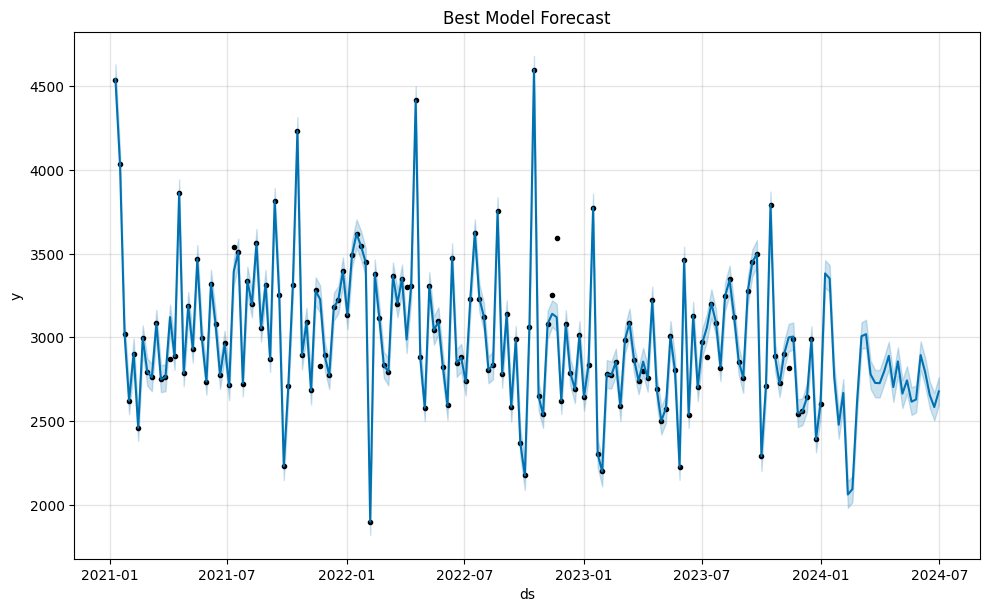

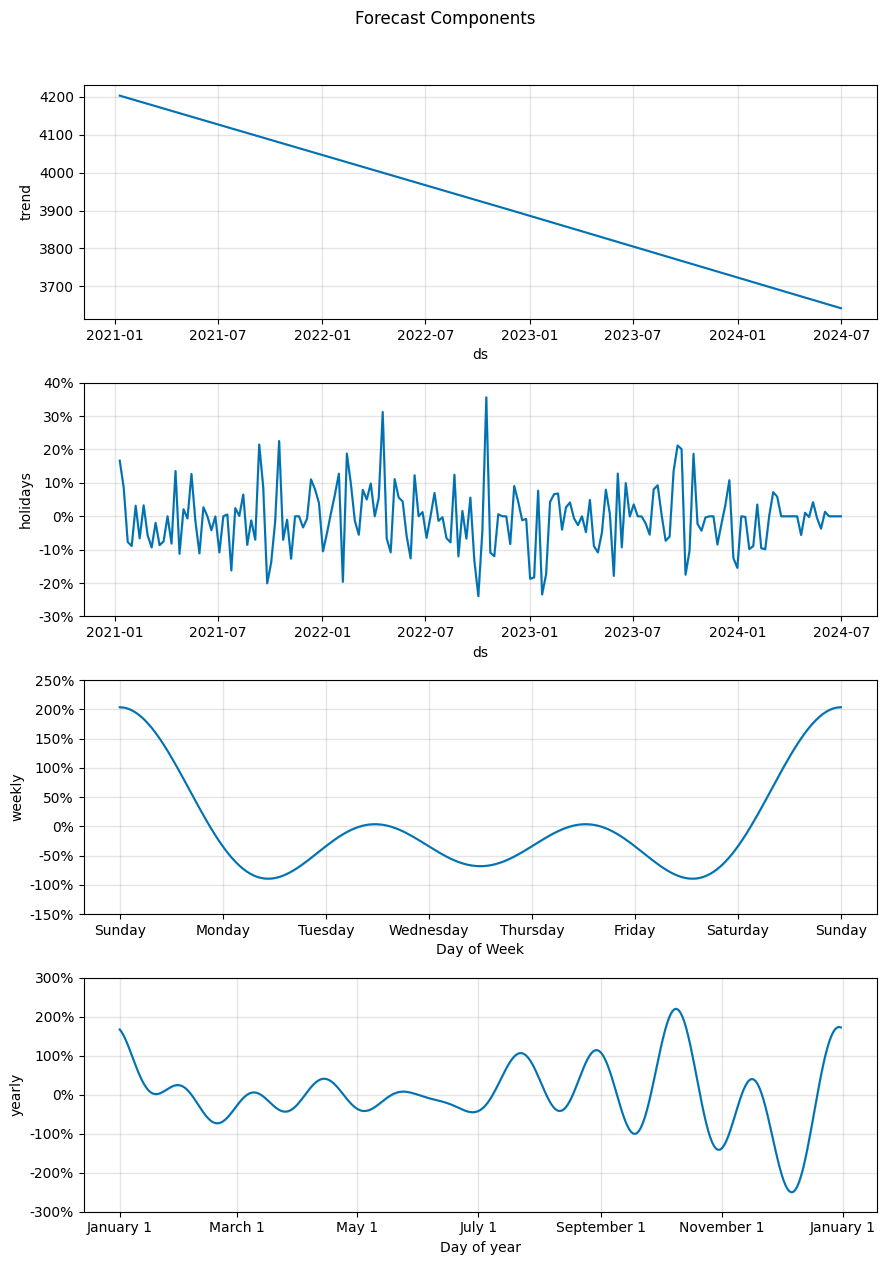

In [41]:
import matplotlib.pyplot as plt 

# 최적 모델의 예측 결과 시각화
fig1 = model.plot(best_forecast)
plt.title('Best Model Forecast')

fig2 = model.plot_components(best_forecast)
plt.suptitle('Forecast Components', y=1.05)

# 특정 날짜 범위 필터링
start_date = '2024-01-01'
end_date = '2024-06-30'

# 필터링된 데이터프레임
filtered_forecast = best_forecast[(best_forecast['ds'] >= start_date) & (best_forecast['ds'] <= end_date)]
filtered_forecast = filtered_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# 필터링된 데이터 출력
print("\nFiltered Forecast Data:")
print(filtered_forecast)


In [42]:
# 예측 결과를 월 단위로 집계
monthly_predictions = best_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# 날짜가 2024년 1월부터 6월까지인 데이터 필터링
monthly_predictions = monthly_predictions[(monthly_predictions['ds'] >= '2024-01-01') & 
                                         (monthly_predictions['ds'] <= '2024-06-30')]

# 월 단위로 집계
monthly_predictions['month'] = monthly_predictions['ds'].dt.to_period('M')
monthly_summary = monthly_predictions.groupby('month').agg({
    'yhat': 'sum',
    'yhat_lower': 'sum',
    'yhat_upper': 'sum'
}).reset_index()

# 결과 출력
print("Monthly Predictions from January to June 2024:")
print(monthly_summary)


Monthly Predictions from January to June 2024:
     month          yhat    yhat_lower    yhat_upper
0  2024-01  11978.856735  11646.868213  12297.951061
1  2024-02   9429.594868   9108.275871   9755.275487
2  2024-03  14262.557779  13846.392695  14667.926673
3  2024-04  11250.246440  10915.822500  11582.404216
4  2024-05  10654.244656  10331.885302  10990.124129
5  2024-06  13606.050073  13193.278161  14026.185283
